In [1]:
#imports
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk


In [2]:
#import data
voqs = pd.read_excel("./test_set_11_20_ds.xlsx", sheetname=0)
voqs.columns = ["odino", "make_mod", "ecode", "compdesc", "cdescr", "defect", "datea", "modelyr", "engine_code"]
voqs.head()

,odino,make_mod,ecode,compdesc,cdescr,defect,datea,modelyr,engine_code
0,11046596,bmw; k1300 gt; 2010; motorcycle; wb1053906az,k44,fuel/propulsion system,tl* the contact owns a 2010 bmw k1300 gt motor...,1747 - (moto) quick-connect fuel line issue,2017-11-16,2010,NaN
1,11045158,bmw; 323i; 1998; car; m52; wbabj8321we,e36,air bags; engine; unknown or other,"a driver, on a 5 lane st, in a center turn lan...",1002 - airbag related injuries,2017-11-10,1998,m52
2,11046601,bmw; 320i; 2016; car; n20; wba8e1g58gn,f30,electrical system; power train; service brakes,car has shut off while in motion and indicator...,1112 - multiple issues,2017-11-16,2016,n20
3,11046895,bmw; 760li; 2006; car; n73; wbahn03566d,e66,electrical system; power train; suspension,"car stops on freeway, numerous problems with s...",1112 - multiple issues,2017-11-17,2006,n73
4,11046876,bmw; x3; 2013; car; n20; 5uxwx9c54d0,f25,exterior lighting,tail lights will fail with no warning light or...,1012 - tail light issue,2017-11-16,2013,n20


In [3]:
#in the dataset, what is the largest issue?
voqs.defect.value_counts()


1007 - passenger seat mat sensor issue                             2152
1008 - power steering pump issue                                   1164
1467 - no replacement parts                                        1008
1080 - defective air bag                                            830
1009 - power steering failure                                       752
1010 - timing chain failure                                         385
1013 - seat heater overheating                                      317
1012 - tail light issue                                             290
1011 - door lock issue                                              284
1014 - engine stalled while driving                                 274
1482 - (moto) final drive bearing failure                           259
1021 - high pressure fuel pump issue                                211
1495 - quick-connect fuel line issue                                198
1015 - lost transmission splines                                

In [4]:
pass_mat =voqs.loc[voqs['defect'] == '1007 - passenger seat mat sensor issue']
pass_mat.count()

odino          2152
make_mod       2152
ecode          2152
compdesc       2152
cdescr         2152
defect         2152
datea          2152
modelyr        2152
engine_code    1928
dtype: int64

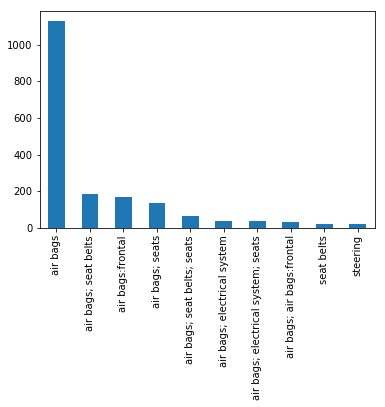

In [16]:
#for the passenger seat mat sensor failure, which component do most consumers log it under when they complain?
#because the defect label comes from an engineer reviewing each complaint, it is closer to what is actually happening
#with the vehicle. Thus, is there a difference between how customers interpret the problem and what is actually happening?
pass_mat.compdesc.value_counts().nlargest(10).plot(kind='bar')
#most customers log this issue under an air bag issue. This is understandable because when the seat mat is faulty, the
#airbag is deactivated.

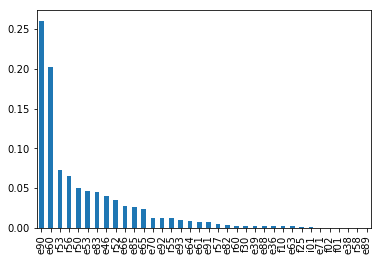

In [10]:
#for the passenger seat mat sensor failure, which cars is it most prevalent on?
pass_mat.ecode.value_counts().plot(kind='bar')


In [52]:
#by far, the issue is most preavlent on e90 and e60 which corresponds to BMW 3 series and 5 series
pass_mat_ecode = pass_mat.loc[(pass_mat['ecode'] == 'e90') | (pass_mat['ecode'] == 'e60') ]
pass_mat_ecode

,odino,make_mod,ecode,compdesc,cdescr,defect,datea,modelyr,engine_code
26,11046039,bmw; 525i; 2006; car; n52; wbane53576c,e60,air bags,tl* the contact owns a 2006 bmw 525i. the cont...,1007 - passenger seat mat sensor issue,2017-11-14,2006,n52
119,11044000,bmw; 3 series; 2006; car; n52; wbavb13516k,e90,air bags; electrical system,takata recall. the front passenger seat sensor...,1007 - passenger seat mat sensor issue,2017-11-06,2006,n52
154,11043124,bmw; 325xi; 2006; car; n52; wbavd13576k,e90,air bags,the front passenger seat sensor in my 2006 bmw...,1007 - passenger seat mat sensor issue,2017-11-03,2006,n52
274,10730431,bmw; 335i; 2007; car; n54; wbavb73587v,e90,air bags; seats,"airbag problem light constantly lit; ""passenge...",1007 - passenger seat mat sensor issue,2015-06-25,2007,n54
280,11034170,bmw; 535xi; 2008; car; n54; wbanv93578c,e60,air bags; seat belts; seats,the passenger seat occupancy mat failure light...,1007 - passenger seat mat sensor issue,2017-10-17,2008,n54
300,11033190,bmw; 328i; 2008; car,e90,air bags; seat belts; seats,seat sensor malfunctioning showing no passenge...,1007 - passenger seat mat sensor issue,2017-10-13,2008,NaN
306,11033047,bmw; 530xi; 2006; car; n52; wbanf73556c,e60,air bags,the airbag light has been on in my vehicle sin...,1007 - passenger seat mat sensor issue,2017-10-12,2006,n52
448,10966132,bmw; 545i; 2005; car; n62; wbanb33575c,e60,air bags,hello sir or ma'am; i am writing to you to ...,1007 - passenger seat mat sensor issue,2017-03-15,2005,n62
451,10968554,bmw; 545i; 2005; car; n62; wbanb33535b,e60,air bags; seat belts,i am writing to you to address a current natio...,1007 - passenger seat mat sensor issue,2017-03-26,2005,n62
468,11023662,bmw; 3 series; 2006; car; n52; wbavb33506k,e90,air bags; seats,takata recall- my airbag in the steering whe...,1007 - passenger seat mat sensor issue,2017-09-15,2006,n52


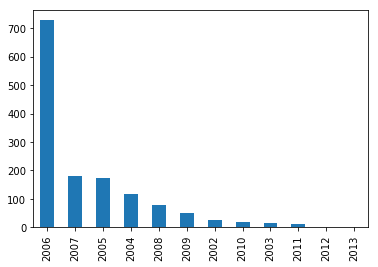

In [38]:
#which model years of these vehicles were the most affected?
pass_mat_ecodes.modelyr.value_counts().plot(kind='bar')

In [6]:
#which ecode, model year combination had the highest complaint count?
pd.crosstab(pass_mat.ecode, pass_mat.modelyr, margins=True)
#2006 E90s had the largest complaint volume by far.
#other ecodes have clusters as well: e60, e90, r50, r53 and r56 are the most notable.

modelyr,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,All
ecode,,,,,,,,,,,,,,,,,
e36,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5
e38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
e39,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,6
e46,0,19,13,12,19,17,4,2,0,0,0,0,0,0,0,0,86
e53,0,0,2,2,3,5,3,86,0,0,0,0,0,0,0,0,101
e60,0,0,0,0,0,108,88,143,60,26,4,7,0,0,0,0,436
e61,0,0,0,0,0,0,0,15,2,0,0,0,0,0,0,0,17
e63,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,5
e64,0,0,0,0,0,2,7,5,2,1,1,1,0,0,0,0,19


In [17]:
#edit the ecode file to include the other ecodes you've discovered
pass_mat_ecodes = pass_mat.loc[(pass_mat['ecode'] == 'e90') | (pass_mat['ecode'] == 'e60') |(pass_mat['ecode'] == 'r50') 
                              | (pass_mat['ecode'] == 'r53') | (pass_mat['ecode'] == 'r56')]
pass_mat_ecodes

,odino,make_mod,ecode,compdesc,cdescr,defect,datea,modelyr,engine_code
26,11046039,bmw; 525i; 2006; car; n52; wbane53576c,e60,air bags,tl* the contact owns a 2006 bmw 525i. the cont...,1007 - passenger seat mat sensor issue,2017-11-14,2006,n52
83,10732348,mini; cooper s; 2002; car; w11; wmwre33492t,r53,air bags; seat belts; seats,the airbag sensor in the seat cushion has fail...,1007 - passenger seat mat sensor issue,2015-07-07,2002,w11
119,11044000,bmw; 3 series; 2006; car; n52; wbavb13516k,e90,air bags; electrical system,takata recall. the front passenger seat sensor...,1007 - passenger seat mat sensor issue,2017-11-06,2006,n52
154,11043124,bmw; 325xi; 2006; car; n52; wbavd13576k,e90,air bags,the front passenger seat sensor in my 2006 bmw...,1007 - passenger seat mat sensor issue,2017-11-03,2006,n52
274,10730431,bmw; 335i; 2007; car; n54; wbavb73587v,e90,air bags; seats,"airbag problem light constantly lit; ""passenge...",1007 - passenger seat mat sensor issue,2015-06-25,2007,n54
280,11034170,bmw; 535xi; 2008; car; n54; wbanv93578c,e60,air bags; seat belts; seats,the passenger seat occupancy mat failure light...,1007 - passenger seat mat sensor issue,2017-10-17,2008,n54
300,11033190,bmw; 328i; 2008; car,e90,air bags; seat belts; seats,seat sensor malfunctioning showing no passenge...,1007 - passenger seat mat sensor issue,2017-10-13,2008,NaN
306,11033047,bmw; 530xi; 2006; car; n52; wbanf73556c,e60,air bags,the airbag light has been on in my vehicle sin...,1007 - passenger seat mat sensor issue,2017-10-12,2006,n52
347,11031812,mini; cooper s; 2009; car; n14; wmwmf73599t,r56,air bags,i own a 2009 mini cooper and the airbag and se...,1007 - passenger seat mat sensor issue,2017-10-04,2009,n14
374,11019708,mini; cooper; 2006; car; w10; wmwrc33576t,r50,air bags,2006 mini cooper. consumer writes in regards ...,1007 - passenger seat mat sensor issue,2017-08-31,2006,w10


In [31]:
#convert the datea column to date format and then assign a count column to use for frequency
pass_mat_ecodes['date'] = pd.to_datetime(pass_mat_ecodes['datea'])
pass_mat_ecodes.index = pass_mat_ecodes['date']

pass_mat_ecodes['count'] = 1
pass_mat_ecodes

C:\Users\muneerhz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\muneerhz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,odino,make_mod,ecode,compdesc,cdescr,defect,datea,modelyr,engine_code,date,count
date,,,,,,,,,,,
2017-11-14,11046039,bmw; 525i; 2006; car; n52; wbane53576c,e60,air bags,tl* the contact owns a 2006 bmw 525i. the cont...,1007 - passenger seat mat sensor issue,2017-11-14,2006,n52,2017-11-14,1
2015-07-07,10732348,mini; cooper s; 2002; car; w11; wmwre33492t,r53,air bags; seat belts; seats,the airbag sensor in the seat cushion has fail...,1007 - passenger seat mat sensor issue,2015-07-07,2002,w11,2015-07-07,1
2017-11-06,11044000,bmw; 3 series; 2006; car; n52; wbavb13516k,e90,air bags; electrical system,takata recall. the front passenger seat sensor...,1007 - passenger seat mat sensor issue,2017-11-06,2006,n52,2017-11-06,1
2017-11-03,11043124,bmw; 325xi; 2006; car; n52; wbavd13576k,e90,air bags,the front passenger seat sensor in my 2006 bmw...,1007 - passenger seat mat sensor issue,2017-11-03,2006,n52,2017-11-03,1
2015-06-25,10730431,bmw; 335i; 2007; car; n54; wbavb73587v,e90,air bags; seats,"airbag problem light constantly lit; ""passenge...",1007 - passenger seat mat sensor issue,2015-06-25,2007,n54,2015-06-25,1
2017-10-17,11034170,bmw; 535xi; 2008; car; n54; wbanv93578c,e60,air bags; seat belts; seats,the passenger seat occupancy mat failure light...,1007 - passenger seat mat sensor issue,2017-10-17,2008,n54,2017-10-17,1
2017-10-13,11033190,bmw; 328i; 2008; car,e90,air bags; seat belts; seats,seat sensor malfunctioning showing no passenge...,1007 - passenger seat mat sensor issue,2017-10-13,2008,NaN,2017-10-13,1
2017-10-12,11033047,bmw; 530xi; 2006; car; n52; wbanf73556c,e60,air bags,the airbag light has been on in my vehicle sin...,1007 - passenger seat mat sensor issue,2017-10-12,2006,n52,2017-10-12,1
2017-10-04,11031812,mini; cooper s; 2009; car; n14; wmwmf73599t,r56,air bags,i own a 2009 mini cooper and the airbag and se...,1007 - passenger seat mat sensor issue,2017-10-04,2009,n14,2017-10-04,1


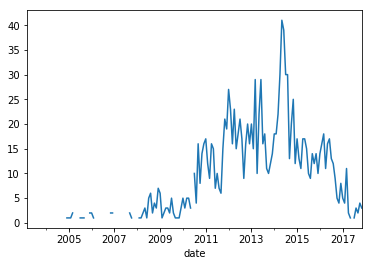

In [35]:
#look at the time history by month ('M') of e60, e90, r50, r53 and r56 "passenger seat mat sensor issue" complaints
pass_mat_only = pass_mat_ecodes['count']
pass_mat_only
pass_mat_only.resample('M').sum().plot()
#for the ecodes that had deficient seat mat sensors, the issue reached its peak in 2014

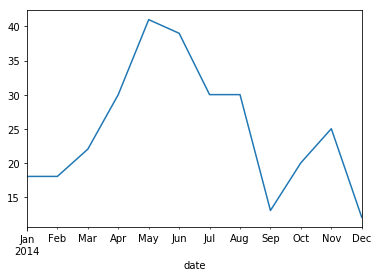

In [37]:
#let's get a closer look at when exactly the complaints were in their highest volume
pass_mat_only['2014'].resample('M').sum().plot()

In [ ]:
#from the data exploration done, we've discovered the following about this dataset:
#1. the complaint with the highest frequency is "passenger seat mat sensor issue" (this defect name
#   is assigned by manual review process)
#2. customers normally log their complaints under this category as an issue with their air bags. 
#3. this issue showed up in highest freqeuncy on e60, e90, r50, r53 and r56. These vehicles are the BMW 5-series,
#   the BMW 3-series, and different generations of the MINI cooper (respectively)
#4. The issue peaked in 2014 and specifically in May of 2014.
# using this information or a similar process, auto manufacturers can try and recall cars within a model year range 
# we found that 2006  series had the most complaints. According to BMW, a recall was issued for these cars 
# (http://www.bmwusa.com/standard/content/contactus/voluntaryrecall.aspx)